In [1]:
import nbsetup as nb
import ergodicpy as ep
import numpy as np
from simulations.ideal_gas.models import IsolatedBox

In [2]:
ensembles = 20
steps = 200
size = 10

worlds = []
for b in range(ensembles):
    worlds.append(IsolatedBox(100, width=size, height=size, skew=0.1))

y = []
for s in range(steps):
    nb.cp(steps-s)
    obs = []
    for w in worlds:
        w.step()
        obs.append(w.observations)
    y.append(obs)

1


In [3]:
es = ep.ErgodicSeries(x=range(steps), y=y, x_label='timesteps', bins=ep.binr(0,size))

3.8% maximum 1.7% mean 1.9% trending 


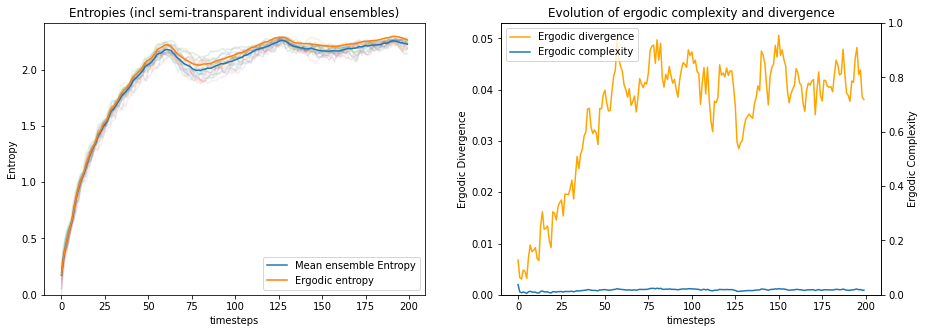

In [4]:
f = es.report()